In [22]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt

In [23]:
#cargar datos 
puntajes = pd.read_csv("../A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv", sep=";", low_memory=False)
socioeconomic = pd.read_csv("../B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv", sep=";")

In [24]:
#quite ciertos datos de socioeconomic que no ibamos a usar :p
new_1 = socioeconomic.drop(['FECHA_NACIMIENTO','ANYO_PROCESO', 'CODIGO_REGION_DOMICILIO','CODIGO_PROVINCIA_DOMICILIO','CODIGO_COMUNA_DOMICILIO','NOMBRE_COMUNA_DOMICILIO'], axis=1)

In [25]:
#quite unos datos de puntajes tambien
columnas_puntajes = ['MRUN', 'DEPENDENCIA', 'PROMEDIO_NOTAS','PTJE_NEM','PTJE_RANKING','CLEC_REG_ACTUAL','MATE1_REG_ACTUAL','MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL','CIEN_REG_ACTUAL','PROMEDIO_CM_MAX','CLEC_MAX','MATE1_MAX','MATE2_MAX','HCSOC_MAX','CIEN_MAX']
new_2 = puntajes[columnas_puntajes]


In [26]:
#merge en MRUN
merged_new = pd.merge(new_1,new_2,on='MRUN')
merged_new

,MRUN,SEXO,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,DISPOSITIVO_1,DISPOSITIVO_2,DISPOSITIVO_3,DISPOSITIVO_4,DISPOSITIVO_5,USO_DISPOSITIVO_1,...,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,PROMEDIO_CM_MAX,CLEC_MAX,MATE1_MAX,MATE2_MAX,HCSOC_MAX,CIEN_MAX
0,3703667,1,8,1,S,N,S,N,N,3,...,846,558,836,748,831,816,846,728,950,748
1,8437289,1,6,2,N,N,S,N,N,0,...,0,0,0,0,0,0,0,0,0,0
2,17372901,1,5,6,N,N,N,S,N,0,...,499,0,0,412,"498,5",498,499,0,0,412
3,16702090,2,3,2,N,N,S,N,N,0,...,0,0,0,0,0,0,0,0,0,0
4,22654139,2,5,5,N,N,N,N,S,0,...,402,413,318,0,383,364,402,413,318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296807,26526755,1,1,3,N,N,S,N,N,0,...,757,483,0,578,695,633,757,483,0,578
296808,26526694,1,2,3,S,N,S,N,N,2,...,516,313,0,498,"638,5",761,516,386,0,498
296809,26526332,1,1,3,N,N,S,N,N,0,...,480,332,578,500,531,582,480,403,578,500
296810,26525532,1,3,3,S,S,S,N,N,1,...,579,292,565,519,"592,5",606,579,292,565,519


Limpieza de datos!!!

In [27]:
tipos_dato = merged_new.dtypes 
print(tipos_dato)

MRUN                           int64
SEXO                           int64
INGRESO_PERCAPITA_GRUPO_FA     int64
RAZON_PRINCIPAL_PAES           int64
DISPOSITIVO_1                 object
DISPOSITIVO_2                 object
DISPOSITIVO_3                 object
DISPOSITIVO_4                 object
DISPOSITIVO_5                 object
USO_DISPOSITIVO_1              int64
USO_DISPOSITIVO_2              int64
USO_DISPOSITIVO_3              int64
HOGAR_CONEXION_INTERNET       object
CONEXION_INSUFICIENTE          int64
ESPACIO_1                     object
ESPACIO_2                     object
ESPACIO_3                     object
ESPACIO_4                     object
ESPACIO_5                     object
ESPACIO_6                     object
ESPACIO_7                     object
ESPACIO_8                     object
ESPACIO_9                     object
USO_ESPACIO_1                  int64
USO_ESPACIO_2                  int64
USO_ESPACIO_3                  int64
USO_ESPACIO_4                  int64
U

In [28]:
import numpy as np

#cambiar las comas por puntos
merged_new['PROMEDIO_CM_MAX'] = merged_new['PROMEDIO_CM_MAX'].str.replace(',', '.').astype(float)
merged_new['PROMEDIO_NOTAS'] = merged_new['PROMEDIO_NOTAS'].str.replace(',', '.').astype(float)

#para todas las columnas que poseen N o S se cambia por 0 o 1
cols = ['DISPOSITIVO_1', 'DISPOSITIVO_2', 'DISPOSITIVO_3', 'DISPOSITIVO_4', 'DISPOSITIVO_5', 'HOGAR_CONEXION_INTERNET', 'ESPACIO_1', 'ESPACIO_2', 'ESPACIO_3', 'ESPACIO_4', 'ESPACIO_5', 'ESPACIO_6', 'ESPACIO_7', 'ESPACIO_8', 'ESPACIO_9']

# Valores distintos a 'N' o 'S' se reemplazan por NaN
for col in cols:
    merged_new[col] = merged_new[col].apply(lambda x: x if x in ['N', 'S'] else np.nan)

# Eliminar los NaN
merged_new.dropna(subset=cols, inplace=True)

# Transformación de tipo
for col in cols:
    merged_new[col] = merged_new[col].str.replace('N', '0').str.replace('S', '1').astype(int)
    print(f"Columna transformada: {col}")

print("\nDataFrame después de la transformación:")
print(merged_new)

Columna transformada: DISPOSITIVO_1
Columna transformada: DISPOSITIVO_2
Columna transformada: DISPOSITIVO_3
Columna transformada: DISPOSITIVO_4
Columna transformada: DISPOSITIVO_5
Columna transformada: HOGAR_CONEXION_INTERNET
Columna transformada: ESPACIO_1
Columna transformada: ESPACIO_2
Columna transformada: ESPACIO_3
Columna transformada: ESPACIO_4
Columna transformada: ESPACIO_5
Columna transformada: ESPACIO_6
Columna transformada: ESPACIO_7
Columna transformada: ESPACIO_8
Columna transformada: ESPACIO_9

DataFrame después de la transformación:
            MRUN  SEXO  INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  \
0        3703667     1                           8                     1   
1        8437289     1                           6                     2   
2       17372901     1                           5                     6   
3       16702090     2                           3                     2   
4       22654139     2                           5               

In [29]:
#para los datos Nan que son discretos se cambian a 0, no se pone el promedio afecta el clustering parece xd
antes = merged_new.shape[0]
for col in merged_new.select_dtypes(include=['object']).columns:
    # merged_new[col] = merged_new[col].replace(' ', '0')
    # merged_new[col] = merged_new[col].astype(int)
    merged_new[col] = pd.to_numeric(merged_new[col], errors='coerce')
    merged_new = merged_new.dropna(subset=[col])
    print(f"Columna transformada: {col}")

print("Filas antes:")
print(antes)
print("Filas eliminadas:")
print(antes-merged_new.shape[0])

Columna transformada: DEPENDENCIA
Columna transformada: CLEC_REG_ACTUAL
Columna transformada: MATE1_REG_ACTUAL
Columna transformada: MATE2_REG_ACTUAL
Columna transformada: HCSOC_REG_ACTUAL
Columna transformada: CIEN_REG_ACTUAL
Filas antes:
285734
Filas eliminadas:
23077


Se empieza a hacer el clustering con ciertas columnas!!!

In [30]:
#seleccion de columnas para hacer el cluster 
data1 = merged_new[['PROMEDIO_CM_MAX', 'INGRESO_PERCAPITA_GRUPO_FA','RAZON_PRINCIPAL_PAES','USO_DISPOSITIVO_1','USO_DISPOSITIVO_2','USO_DISPOSITIVO_3','CONEXION_INSUFICIENTE','USO_ESPACIO_1','USO_ESPACIO_2','USO_ESPACIO_3','USO_ESPACIO_4','USO_ESPACIO_5','USO_ESPACIO_6','USO_ESPACIO_7','USO_ESPACIO_8','TRANQUILIDAD_COLEGIO','TRABAJO_GRUPO_COLEGIO']]
idxs = [1, 4, 7, 13]

#se filtran los datos que no necesitamos
data = data1[(data1['RAZON_PRINCIPAL_PAES'].isin([1,2,3,4,5,6,8]))& (data1['PROMEDIO_CM_MAX']>=200)&(data1['INGRESO_PERCAPITA_GRUPO_FA'] != 99)]

#esto es solamente si es que se quiere usar el promedio en las columnas pero no resulto creo
columns_to_check = ['RAZON_PRINCIPAL_PAES','PROMEDIO_CM_MAX','INGRESO_PERCAPITA_GRUPO_FA','USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 
                    'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 
                    'USO_ESPACIO_5', 'USO_ESPACIO_6', 'USO_ESPACIO_7', 'USO_ESPACIO_8', 
                    'CONEXION_INSUFICIENTE', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']

#se transforman los valores 0 o 9 a Nan
values_to_replace = [0,9]
for col in columns_to_check:
    col_mean = data[col].replace(values_to_replace, np.nan).mean()
    data[col] = data[col].replace(values_to_replace, col_mean)

#solo se hace el cluster con estos valores
columns = ['USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 
            'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 
            'USO_ESPACIO_5', 'USO_ESPACIO_6', 'USO_ESPACIO_7', 'USO_ESPACIO_8', 
            'CONEXION_INSUFICIENTE', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']

#new_data = data[columns]

data_promedio = data.pop('PROMEDIO_CM_MAX')
data.shape

(176648, 16)

In [31]:
data['PROMEDIO_CM_MAX'] = data_promedio
data['PROMEDIO_CM_MAX'] = pd.to_numeric(data['PROMEDIO_CM_MAX'], errors='coerce').astype(int)
data['PROMEDIO_CM_MAX'] = data['PROMEDIO_CM_MAX'].dropna()

In [32]:
data['PUNTAJE_PROM'] = (data['PROMEDIO_CM_MAX']/100).astype(int)*100
del data['PROMEDIO_CM_MAX']
x = data.drop('PUNTAJE_PROM', axis=1)
y = data['PUNTAJE_PROM']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=15)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         200       0.00      0.00      0.00         9
         300       0.06      0.01      0.01       514
         400       0.35      0.21      0.26      9323
         500       0.40      0.59      0.48     19319
         600       0.31      0.31      0.31     13951
         700       0.20      0.10      0.13      6274
         800       0.19      0.08      0.11      2763
         900       0.17      0.05      0.08       842

    accuracy                           0.35     52995
   macro avg       0.21      0.17      0.17     52995
weighted avg       0.32      0.35      0.32     52995



c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[    0     0     2     5     2     0     0     0]
 [    0     5   151   294    53     9     2     0]
 [    0    17  1937  5459  1592   238    66    14]
 [    0    23  2129 11602  4591   749   192    33]
 [    0    12   890  7516  4217   985   280    51]
 [    0     5   263  2903  2217   632   216    38]
 [    0     2    78  1019  1007   383   213    61]
 [    0     0    17   218   284   150   132    41]]


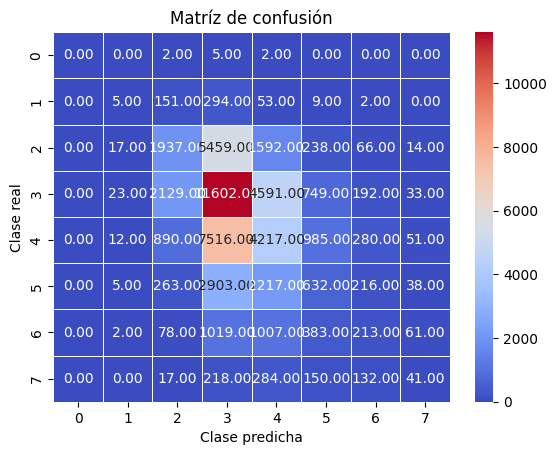

In [40]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matríz de confusión')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         200       0.00      0.00      0.00         9
         300       0.02      0.03      0.02       514
         400       0.25      0.25      0.25      9323
         500       0.39      0.39      0.39     19319
         600       0.29      0.27      0.28     13951
         700       0.16      0.16      0.16      6274
         800       0.11      0.12      0.12      2763
         900       0.09      0.10      0.09       842

    accuracy                           0.29     52995
   macro avg       0.16      0.16      0.16     52995
weighted avg       0.29      0.29      0.29     52995



c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         200       0.00      0.00      0.00         9
         300       0.00      0.00      0.00       514
         400       0.00      0.00      0.00      9323
         500       0.38      0.95      0.54     19319
         600       0.29      0.09      0.13     13951
         700       0.32      0.00      0.00      6274
         800       0.29      0.04      0.07      2763
         900       0.16      0.01      0.02       842

    accuracy                           0.37     52995
   macro avg       0.18      0.14      0.10     52995
weighted avg       0.27      0.37      0.24     52995



c:\Users\mmira\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmira\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         200       0.00      0.00      0.00         9
         300       0.02      0.01      0.02       514
         400       0.24      0.28      0.26      9323
         500       0.38      0.52      0.44     19319
         600       0.29      0.24      0.26     13951
         700       0.17      0.08      0.11      6274
         800       0.17      0.06      0.09      2763
         900       0.19      0.04      0.07       842

    accuracy                           0.31     52995
   macro avg       0.18      0.15      0.16     52995
weighted avg       0.29      0.31      0.29     52995

